# Python Linear Regression with Stochastic Gradient Descent (SGD)

## Step 1: Problem Setup

Linear regression aims to find the best-fitting line to a set of data points. The model is represented as:

$$
y = X \beta + \epsilon
$$

where:
- $y$ is the vector of observed values,
- $X$ is the design matrix (input features),
- $\beta$ is the vector of coefficients (weights),
- $\epsilon$ is the error term.

We want to find $\beta$ such that it minimizes the sum of squared errors (SSE):

$$
J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - X^{(i)} \beta)^2
$$

where $m$ is the number of training examples.

---

## Step 2: Stochastic Gradient Descent

In Stochastic Gradient Descent, we update the coefficients $\beta$ iteratively using each training example. The update rule is:

$$
\beta := \beta - \eta \nabla_{\beta} J(\beta)
$$

where:
- $\eta$ is the learning rate,
- $\nabla_{\beta} J(\beta)$ is the gradient of the cost function with respect to $\beta$.

---

## Step 3: Gradient of the Cost Function

To find the gradient of the cost function with respect to $\beta$, we compute the partial derivative:

$$
\nabla_{\beta} J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} X^{(i)} (y^{(i)} - X^{(i)} \beta)
$$

For Stochastic Gradient Descent, we use only one example at a time. Hence, the gradient for each training example is:

$$
\nabla_{\beta} J(\beta) \approx -X^{(i)} (y^{(i)} - X^{(i)} \beta)
$$

where $X^{(i)}$ and $y^{(i)}$ represent the $i$-th training example and its corresponding label.

---

## Step 4: Update Rule for SGD

Using the gradient from Step 3, the update rule for $\beta$ becomes:

$$
\beta := \beta - \eta X^{(i)} (y^{(i)} - X^{(i)} \beta)
$$

where:
- $\eta$ is the learning rate,
- $X^{(i)}$ is the feature vector of the $i$-th training example,
- $y^{(i)}$ is the true label for the $i$-th training example.

This update is applied iteratively for each example.

---

## Step 5: Algorithm

The algorithm for Linear Regression with Stochastic Gradient Descent is as follows:

1. Initialize $\beta$ with small random values.
2. For each epoch:
   1. For each training example $(X^{(i)}, y^{(i)})$:
      - Compute the prediction $\hat{y}^{(i)} = X^{(i)} \beta$.
      - Compute the gradient: $\nabla_{\beta} J(\beta) = -X^{(i)} (y^{(i)} - X^{(i)} \beta)$.
      - Update $\beta$: $\beta := \beta - \eta X^{(i)} (y^{(i)} - X^{(i)} \beta)$.
3. Repeat until convergence or after a predefined number of epochs.

---

## Step 6: Code Implementation

Here’s the Python implementation using Stochastic Gradient Descent for Linear Regression:

```python
import numpy as np

# Generate some sample data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])  # Input features
y = np.dot(X, np.array([1, 2])) + 3  # True labels with some noise

# Initialize parameters
m, n = X.shape
beta = np.random.randn(n)  # Random initialization of coefficients
eta = 0.01  # Learning rate
epochs = 1000  # Number of epochs

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(m):
        xi = X[i, :]
        yi = y[i]
        prediction = np.dot(xi, beta)
        gradient = -xi * (yi - prediction)
        beta = beta - eta * gradient

    if epoch % 100 == 0:
        # Print progress every 100 epochs
        print(f'Epoch {epoch}, Coefficients: {beta}')

print(f'Final coefficients: {beta}')
Step 7: Conclusion
Stochastic Gradient Descent is an efficient way to solve the Linear Regression problem, especially when dealing with large datasets. The key advantage of SGD over batch gradient descent is that it updates the model parameters more frequently and uses only one training example at a time, leading to faster convergence in practice.

Iteration 0: Loss = 355.6537, w0 = -0.1140, w1 = 1.8620
Iteration 10: Loss = 2.9160, w0 = 0.1219, w1 = 2.4763
Iteration 20: Loss = 2.7186, w0 = 0.2605, w1 = 2.4564
Iteration 30: Loss = 2.5371, w0 = 0.3934, w1 = 2.4373
Iteration 40: Loss = 2.3702, w0 = 0.5209, w1 = 2.4190
Iteration 50: Loss = 2.2168, w0 = 0.6431, w1 = 2.4015
Iteration 60: Loss = 2.0758, w0 = 0.7602, w1 = 2.3846
Iteration 70: Loss = 1.9462, w0 = 0.8726, w1 = 2.3685
Iteration 80: Loss = 1.8270, w0 = 0.9803, w1 = 2.3530
Iteration 90: Loss = 1.7175, w0 = 1.0835, w1 = 2.3382

Optimal parameters: w0 = 1.1728, w1 = 2.3254

Data Points and Predictions:


,x,Actual y,Predicted y,Residuals
0,1,5.496714,3.498188,1.998526
1,2,6.861736,5.823556,1.038180
2,3,9.647689,8.148924,1.498765
3,4,12.523030,10.474292,2.048738
4,5,12.765847,12.799660,-0.033813
5,6,14.765863,15.125028,-0.359165
6,7,18.579213,17.450396,1.128817
7,8,19.767435,19.775764,-0.008329
8,9,20.530526,22.101132,-1.570606
9,10,23.542560,24.426500,-0.883940


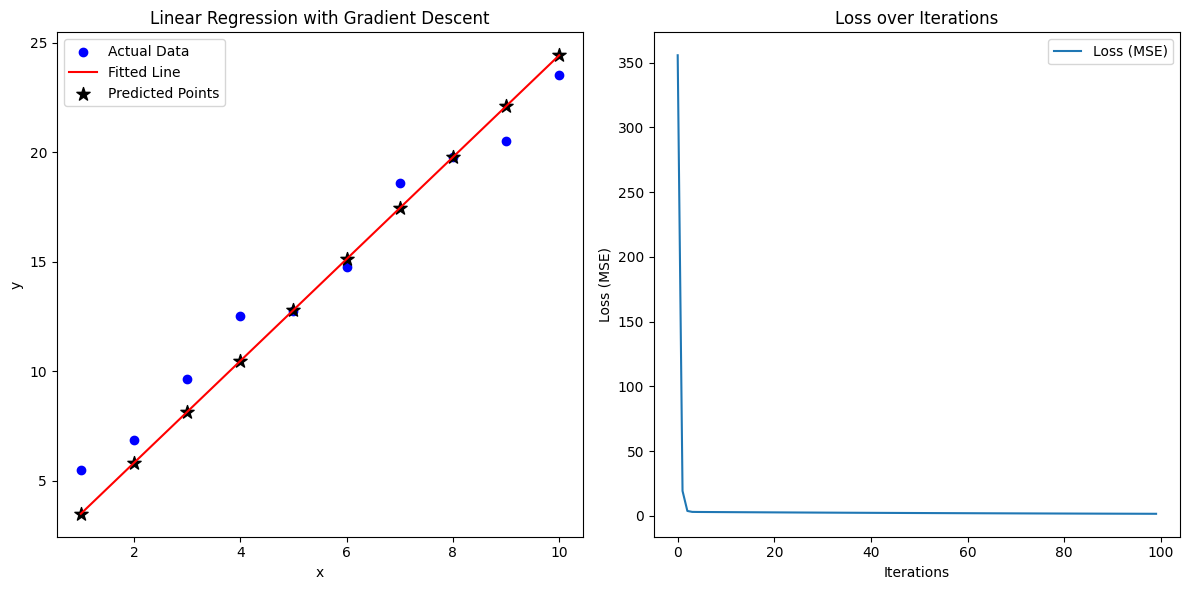

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define toy data
np.random.seed(42)
x_data = np.arange(1, 11)  # Independent variable (1 to 10)
y_data = 2 * x_data + 3 + np.random.normal(0, 1, size=x_data.shape)  # Dependent variable with noise

# Hyperparameters
learning_rate = 0.01
n_iterations = 100

# Initialize parameters
w0 = np.random.randn()  # Intercept
w1 = np.random.randn()  # Slope

# Number of data points
n = len(x_data)

# Store the loss at each iteration for visualization
loss_history = []

# Gradient descent loop
for i in range(n_iterations):
    # Predictions
    y_pred = w0 + w1 * x_data

    # Compute gradients
    gradient_w0 = -(2/n) * np.sum(y_data - y_pred)
    gradient_w1 = -(2/n) * np.sum((y_data - y_pred) * x_data)

    # Update parameters
    w0 -= learning_rate * gradient_w0
    w1 -= learning_rate * gradient_w1

    # Compute loss (MSE)
    loss = np.mean((y_data - y_pred) ** 2)
    loss_history.append(loss)

    # Print progress every 100 iterations
    if i % int(n_iterations*0.10) == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}, w0 = {w0:.4f}, w1 = {w1:.4f}")

# Final parameters
print(f"\nOptimal parameters: w0 = {w0:.4f}, w1 = {w1:.4f}")

# Create a DataFrame with the actual and predicted values
y_pred = w0 + w1 * x_data  # Final predictions
residuals = y_data - y_pred  # Residuals
df = pd.DataFrame({
    'x': x_data,
    'Actual y': y_data,
    'Predicted y': y_pred,
    'Residuals': residuals
})

print("\nData Points and Predictions:")
display(df)  # Display the DataFrame in the output(df)

# Plotting results
plt.figure(figsize=(12, 6))

# Plot original data and fitted line
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Line')
plt.scatter(x_data, y_pred, color='black', marker='*', s=n_iterations, label='Predicted Points')  # Predicted points
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot loss over iterations
plt.subplot(1, 2, 2)
plt.plot(loss_history, label='Loss (MSE)')
plt.title('Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.tight_layout()
plt.show()

Iteration 0: Loss = 355.6537, w0 = -0.1140, w1 = 1.8620
Iteration 2: Loss = 3.8285, w0 = 0.0025, w1 = 2.4637
Iteration 4: Loss = 3.0443, w0 = 0.0356, w1 = 2.4873
Iteration 6: Loss = 2.9998, w0 = 0.0647, w1 = 2.4845
Iteration 8: Loss = 2.9575, w0 = 0.0934, w1 = 2.4804
Iteration 10: Loss = 2.9160, w0 = 0.1219, w1 = 2.4763
Iteration 12: Loss = 2.8752, w0 = 0.1501, w1 = 2.4723
Iteration 14: Loss = 2.8350, w0 = 0.1780, w1 = 2.4683
Iteration 16: Loss = 2.7956, w0 = 0.2057, w1 = 2.4643
Iteration 18: Loss = 2.7567, w0 = 0.2332, w1 = 2.4603

Optimal parameters: w0 = 0.2469, w1 = 2.4584

Data Points and Predictions:


,x,Actual y,Predicted y,Residuals
0,1,5.496714,2.705268,2.791446
1,2,6.861736,5.163635,1.698100
2,3,9.647689,7.622003,2.025685
3,4,12.523030,10.080371,2.442659
4,5,12.765847,12.538738,0.227108
5,6,14.765863,14.997106,-0.231243
6,7,18.579213,17.455473,1.123739
7,8,19.767435,19.913841,-0.146406
8,9,20.530526,22.372209,-1.841683
9,10,23.542560,24.830576,-1.288016


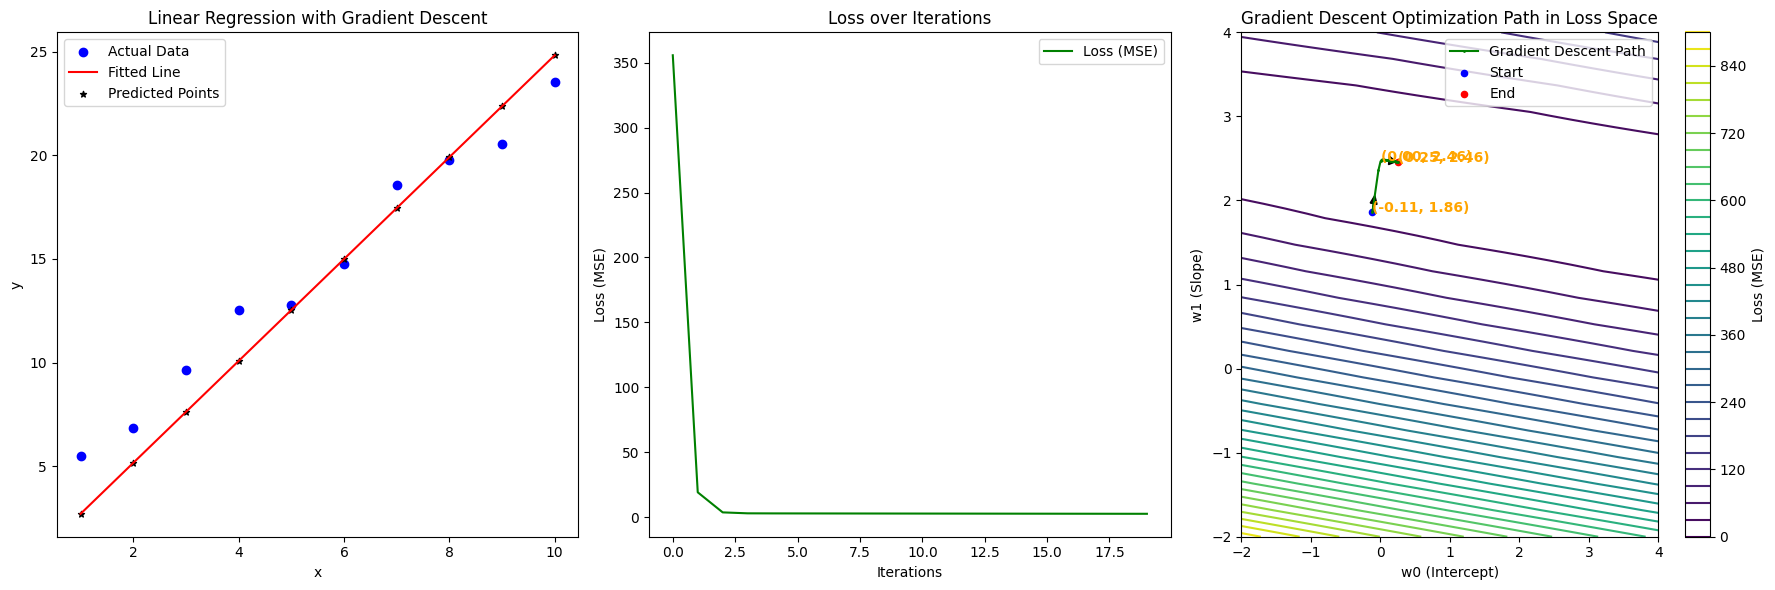

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define toy data
np.random.seed(42)
x_data = np.arange(1, 11)  # Independent variable (1 to 10)
y_data = 2 * x_data + 3 + np.random.normal(0, 1, size=x_data.shape)  # Dependent variable with noise

# Hyperparameters
learning_rate = 0.01
n_iterations = 20

# Initialize parameters
w0 = np.random.randn()  # Intercept
w1 = np.random.randn()  # Slope

# Number of data points
n = len(x_data)

# Store the loss at each iteration for visualization
loss_history = []
param_history = []  # To track (w0, w1)

# Gradient descent loop
for i in range(n_iterations):
    # Predictions
    y_pred = w0 + w1 * x_data

    # Compute gradients
    gradient_w0 = -(2/n) * np.sum(y_data - y_pred)
    gradient_w1 = -(2/n) * np.sum((y_data - y_pred) * x_data)

    # Update parameters
    w0 -= learning_rate * gradient_w0
    w1 -= learning_rate * gradient_w1

    # Compute loss (MSE)
    loss = np.mean((y_data - y_pred) ** 2)
    loss_history.append(loss)
    param_history.append((w0, w1))  # Track parameters

    # Print progress every 100 iterations
    if i % int(n_iterations*0.10) == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}, w0 = {w0:.4f}, w1 = {w1:.4f}")

# Final parameters
print(f"\nOptimal parameters: w0 = {w0:.4f}, w1 = {w1:.4f}")

# Create a DataFrame with the actual and predicted values
y_pred = w0 + w1 * x_data  # Final predictions
residuals = y_data - y_pred  # Residuals
df = pd.DataFrame({
    'x': x_data,
    'Actual y': y_data,
    'Predicted y': y_pred,
    'Residuals': residuals
})

print("\nData Points and Predictions:")
display(df)

# Prepare gradient descent path visualization
param_history = np.array(param_history)
w0_path, w1_path = param_history[:, 0], param_history[:, 1]

# Create parameter grid for contour plot
w0_range = np.linspace(-2, 4, n_iterations)
w1_range = np.linspace(-2, 4, n_iterations)
W0, W1 = np.meshgrid(w0_range, w1_range)

# Compute loss for each (w0, w1) pair
loss_surface = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        y_pred_grid = W0[i, j] + W1[i, j] * x_data
        loss_surface[i, j] = np.mean((y_data - y_pred_grid) ** 2)

# Extract parameter history for visualization
param_history = np.array(param_history)
w0_path = param_history[:, 0]
w1_path = param_history[:, 1]

# Plot results in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Original data and fitted line
axes[0].scatter(x_data, y_data, color='blue', label='Actual Data')
axes[0].plot(x_data, y_pred, color='red', label='Fitted Line')
axes[0].scatter(x_data, y_pred, color='black', marker='*', s=n_iterations, label='Predicted Points')  # Predicted points
axes[0].set_title('Linear Regression with Gradient Descent')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# Subplot 2: Loss over iterations
axes[1].plot(loss_history, label='Loss (MSE)', color='green')
axes[1].set_title('Loss over Iterations')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()

# Subplot 3: Gradient descent path on contour plot
cp = axes[2].contour(W0, W1, loss_surface, levels=30, cmap='viridis')
axes[2].plot(w0_path, w1_path, 'g-o', label='Gradient Descent Path', markersize=1)
axes[2].scatter(w0_path[0], w1_path[0], color='blue', label='Start', s=n_iterations)  # Start point
axes[2].scatter(w0_path[-1], w1_path[-1], color='red', label='End', s=n_iterations)  # End point
plt.colorbar(cp, label='Loss (MSE)')
axes[2].set_xlabel('w0 (Intercept)')
axes[2].set_ylabel('w1 (Slope)')
axes[2].set_title('Gradient Descent Optimization Path in Loss Space')
axes[2].legend()

# Add gradient vectors to show movement (arrows from start to end)
for i in range(0, len(w0_path)-1, 10):  # Add arrows every 10 iterations, but ensure there's an end
    axes[2].arrow(w0_path[i], w1_path[i],
                  0.2*(w0_path[i+1] - w0_path[i]),
                  0.2*(w1_path[i+1] - w1_path[i]),
                  head_width=0.1, head_length=0.1, fc='k', ec='k')

# Annotate start, end, and every 2nd point on the contour plot
indices_to_annotate = [0, len(w0_path)-1] + list(range(2, len(w0_path), n_iterations))  # Start, end, and every 2nd point
for i in indices_to_annotate:
    axes[2].text(w0_path[i], w1_path[i], f"({w0_path[i]:.2f}, {w1_path[i]:.2f})",
                 color='orange', fontsize=10, fontweight='bold', ha='left')

plt.tight_layout()
plt.show()


Final parameters: w0 = 1.1728, w1 = 2.3254


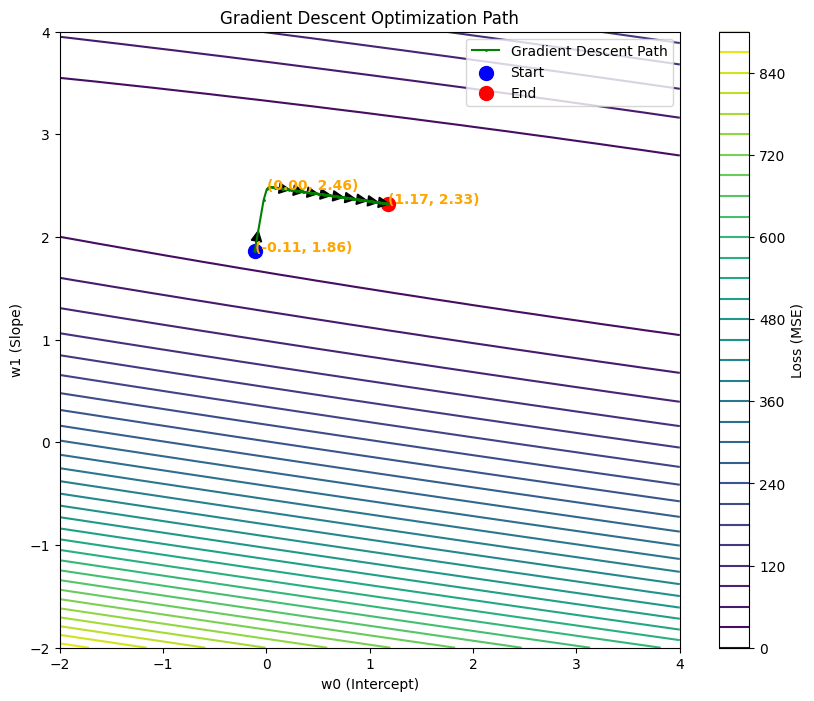

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define toy data
np.random.seed(42)
x_data = np.arange(1, 11)  # Independent variable (1 to 10)
y_data = 2 * x_data + 3 + np.random.normal(0, 1, size=x_data.shape)  # Dependent variable with noise

# Hyperparameters
learning_rate = 0.01
n_iterations = 100

# Initialize parameters
w0 = np.random.randn()  # Intercept
w1 = np.random.randn()  # Slope

# Number of data points
n = len(x_data)

# Store the loss at each iteration for visualization
loss_history = []
param_history = []  # Track (w0, w1) updates

# Gradient descent loop
for i in range(n_iterations):
    # Predictions
    y_pred = w0 + w1 * x_data

    # Compute gradients
    gradient_w0 = -(2/n) * np.sum(y_data - y_pred)
    gradient_w1 = -(2/n) * np.sum((y_data - y_pred) * x_data)

    # Update parameters
    w0 -= learning_rate * gradient_w0
    w1 -= learning_rate * gradient_w1

    # Compute loss (MSE)
    loss = np.mean((y_data - y_pred) ** 2)
    loss_history.append(loss)
    param_history.append((w0, w1))  # Store parameter updates

# Final parameters
print(f"\nFinal parameters: w0 = {w0:.4f}, w1 = {w1:.4f}")

# Create parameter grid for contour plot
w0_range = np.linspace(-2, 4, n_iterations)
w1_range = np.linspace(-2, 4, n_iterations)
W0, W1 = np.meshgrid(w0_range, w1_range)

# Compute loss for each (w0, w1) pair
loss_surface = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        y_pred_grid = W0[i, j] + W1[i, j] * x_data
        loss_surface[i, j] = np.mean((y_data - y_pred_grid) ** 2)

# Extract parameter history for visualization
param_history = np.array(param_history)
w0_path = param_history[:, 0]
w1_path = param_history[:, 1]

# Plot the contour and gradient descent path
plt.figure(figsize=(10, 8))

# Contour plot of the loss function
cp = plt.contour(W0, W1, loss_surface, levels=30, cmap='viridis')
plt.colorbar(cp, label='Loss (MSE)')
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
plt.title('Gradient Descent Optimization Path')

# Plot the gradient descent path
plt.plot(w0_path, w1_path, 'g-o', label='Gradient Descent Path', markersize=1)
plt.scatter(w0_path[0], w1_path[0], color='blue', label='Start', s=n_iterations)  # Start point
plt.scatter(w0_path[-1], w1_path[-1], color='red', label='End', s=n_iterations)  # End point

# Add gradient vectors to show movement (arrows from start to end)
for i in range(0, len(w0_path)-1, 10):  # Add arrows every 10 iterations, but ensure there's an end
    plt.arrow(w0_path[i], w1_path[i],
              0.2*(w0_path[i+1] - w0_path[i]),
              0.2*(w1_path[i+1] - w1_path[i]),
              head_width=0.1, head_length=0.1, fc='k', ec='k')

# Annotate start, end, and every 2nd point on the contour plot
indices_to_annotate = [0, len(w0_path)-1] + list(range(2, len(w0_path), n_iterations))  # Start, end, and every 2nd point
for i in indices_to_annotate:
    plt.text(w0_path[i], w1_path[i], f"({w0_path[i]:.2f}, {w1_path[i]:.2f})",
                 color='orange', fontsize=10, fontweight='bold', ha='left')

plt.legend()

plt.show()